In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.naive_bayes import *
from sklearn.metrics import *

In [48]:
data = pd.read_csv('./iris1.csv')
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
x_var = data.drop(columns='Class', axis=1)
y_var = data['Class']
y_var = y_var.map({
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2,
})

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.3)
print(np.unique(data['Class'], return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([50, 50, 50]))


In [51]:
mulnb = MultinomialNB()
gausnb = GaussianNB()
mulnb.fit(x_train, y_train)
gausnb.fit(x_train, y_train)

GaussianNB()

In [52]:
mulpredictions = mulnb.predict(x_test)
gauspredictions = gausnb.predict(x_test)

In [53]:
print(classification_report(y_test, mulpredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [54]:

print(classification_report(y_test, gauspredictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



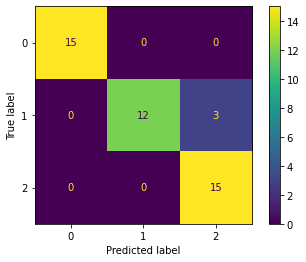

In [55]:
ConfusionMatrixDisplay.from_predictions(y_test, gauspredictions)

In [56]:
print(accuracy_score(y_test, gauspredictions))

0.9333333333333333


In [57]:
y_0 = y_var.map({
    0 : 1,
    1 : 0,
    2 : 0
})
y_1 = y_var.map({
    0 : 0,
    1 : 1,
    2 : 0
})
y_2 = y_var.map({
    0 : 0,
    1 : 0,
    2 : 1
})

In [58]:
print(roc_auc_score(y_test, gausnb.predict_proba(x_test), multi_class='ovo'))

1.0


/home/sal/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


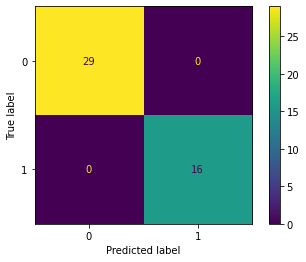

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y_0, test_size=0.3)
gausnb.fit(x_train,y_train)
predictions = gausnb.predict(x_test)
plot_confusion_matrix(gausnb, x_test, y_test)

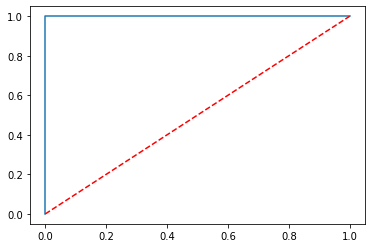

In [60]:
y_true= []
for i in y_test:
    if i == 0:
        y_true.append(0)
    else:
        y_true.append(1)

proba = gausnb.predict_proba(x_test)[:,1]
fpr0, tpr0, _ = roc_curve(y_true, proba)
plt.plot(fpr0, tpr0)
plt.plot([0,1],[0,1],'r--')
plt.show()

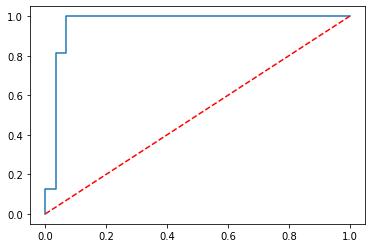

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y_1, test_size=0.3)
gausnb.fit(x_train,y_train)
predictions = gausnb.predict(x_test)
y_true= []
for i in y_test:
    if i == 0:
        y_true.append(0)
    else:
        y_true.append(1)

proba = gausnb.predict_proba(x_test)[:,1]
fpr1, tpr1, _ = roc_curve(y_true, proba)
plt.plot(fpr1, tpr1)
plt.plot([0,1],[0,1],'r--')
plt.show()

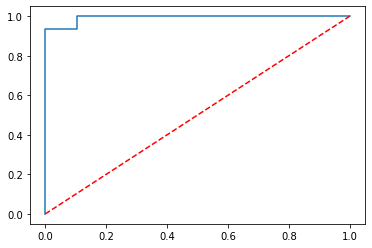

In [62]:

x_train, x_test, y_train, y_test = train_test_split(x_var, y_2, test_size=0.3)
gausnb.fit(x_train,y_train)
predictions = gausnb.predict(x_test)
y_true= []
for i in y_test:
    if i == 0:
        y_true.append(0)
    else:
        y_true.append(1)

proba = gausnb.predict_proba(x_test)[:,1]
fpr2, tpr2, _ = roc_curve(y_true, proba)
plt.plot(fpr2, tpr2)
plt.plot([0,1],[0,1],'r--')
plt.show()

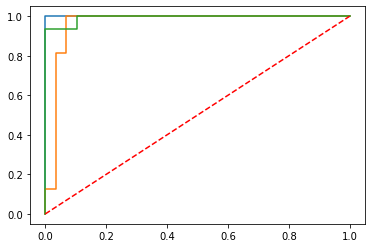

In [63]:
plt.plot(fpr0,tpr0)
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.plot([0,1],[0,1],'r--')
plt.show()